# Mean-shift clustering - Baseline model

Best suited for:

Arbitrary-shaped clusters: Can handle clusters of any shape, including non-convex and overlapping clusters.

Unknown number of clusters: Automatically determines the number of clusters based on data density.

Noisy data: More robust to noise and outliers.

When to avoid:

High-dimensional data: Can be computationally expensive for high-dimensional datasets.

Sensitivity to bandwidth parameter: The choice of bandwidth can significantly impact the clustering results.

Usecases :

1. Image Processing and Computer Vision :

Image Segmentation: Grouping pixels into regions based on color and texture similarities.

Object Tracking: Tracking moving objects in video sequences.

Feature Detection: Identifying salient features in images.

2. Data Mining and Machine Learning

Customer Segmentation: Grouping customers based on their behavior and preferences.

Anomaly Detection: Identifying outliers or anomalies in data.

Feature Engineering: Creating new features by clustering similar data points.

3. Bioinformatics

Protein Structure Analysis: Identifying protein clusters based on structural similarity.

Gene Expression Analysis: Grouping genes with similar expression patterns.

4. Financial Analysis

Customer Segmentation: Grouping customers based on their financial behavior.

Fraud Detection: Identifying anomalous transactions.

In summary, Mean-Shift clustering is a versatile algorithm that can be applied to a wide range of real-world problems.Its ability to handle non-spherical clusters and automatically determine the number of clusters makes it a powerful tool for data analysis and machine learning.



# 1. Import necessary libaries

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs

# 2. Generate Sample Dataset

In [2]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)

In [7]:
X.shape

(10000, 2)

In [12]:
pd.DataFrame(X)

,0,1
0,-0.936603,-1.464980
1,1.486608,1.321944
2,1.110248,0.400407
3,0.281356,1.412502
4,1.207587,-0.912953
...,...,...
9995,-0.054733,-1.344067
9996,-1.072279,-1.315229
9997,-0.673469,-1.206185
9998,-0.487803,-0.820858


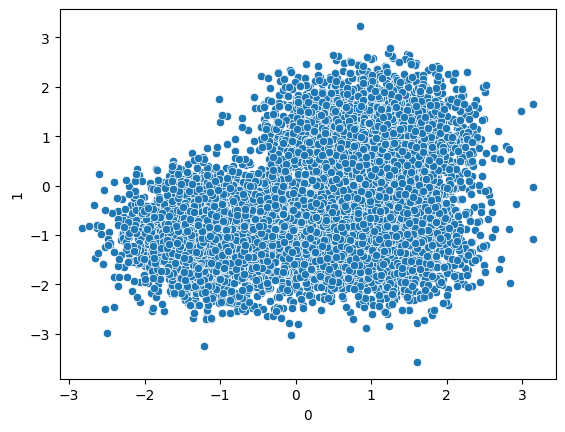

In [26]:
sns.scatterplot(x=0 , y=1, data=pd.DataFrame(X));

In [13]:
pd.DataFrame(X).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       10000 non-null  float64
 1   1       10000 non-null  float64
dtypes: float64(2)
memory usage: 156.4 KB


In [14]:
pd.DataFrame(X).describe()

,0,1
count,10000.000000,10000.000000
mean,0.337440,-0.335503
std,1.100396,1.117008
min,-2.826046,-3.572412
25%,-0.578649,-1.197480
50%,0.592219,-0.587007
75%,1.186971,0.626328
max,3.145905,3.232651


# 3. Model Development

In [15]:
# The following bandwidth can be automatically detected using

bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

In [16]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

In [19]:
pd.Series(labels).value_counts()

,count
2,3341
0,3335
1,3324


In [21]:
pd.DataFrame(cluster_centers)

,0,1
0,0.889795,-0.936854
1,1.010889,0.943835
2,-0.882277,-0.993594


In [22]:
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 3


# 4. Cluster visualization

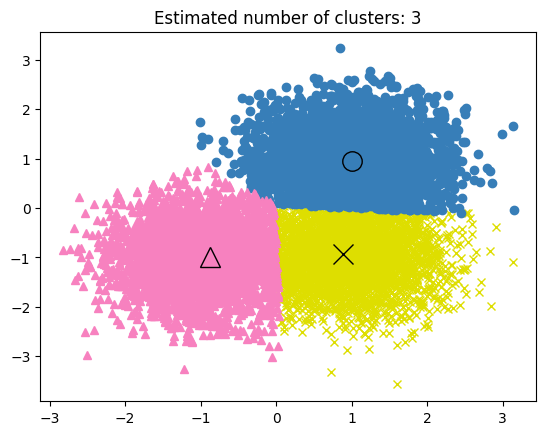

In [27]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.clf()

colors = ["#dede00", "#377eb8", "#f781bf"]
markers = ["x", "o", "^"]

for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], markers[k], color=col)
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        markers[k],
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()